# Report: Correlation between temperature and Co2 emmissions in India

# Contents:

1. Introduction
    - Objective
2. Methods
3. Data source
4. Installation of dependencies
5. Loading data
6. Analysis
    - Scatter plots
    - Correlation coefficients
    - Correlation and covariance matrices
    - Heatmaps
7. Results
    - Inference 1 
    - Inference 2  
8. Summary
    - Inference 3
9. Furthur research

# Introduction

This data engineering project aims at analysing whether Co2 emmissions are correlated with temperature in India.
In our analysis, we investigate the relationship between annual carbon dioxide (CO2) emissions and global temperatures over a set of years, using a common base of time—specifically, the year. Our examination comprises of using and combining visualizations and statistical measures to imply a correlation between these two crucial variables.

## Objective:
During a specific time period, does a statistically significant correlation exist between carbon dioxide (CO2) emissions and temperatures, and if so, what is the strength and nature of this correlation?

    Question 1. Is there any change in temperature between 2010 and 2017?
    Question 2. Is there any change in Co2 emmissions between 2010 and 2017?
    Question 3. Is there any correlation between Co2 emmissions and temperatures during a certain time period? 

# Methods

- The following methods and approaches were used in this data engineering project:
    1. Data gathered from Kaggle: an open source platform and community for data scientists.
    2. Clean the data.
        - Remove unwanted old data from 20th century.
        - Rename the column names for ease of understanding and convenience.
    3. Arrange data of both dataframes based on a speicific and common base of time - year.
    4. Create a pipeline, test file and CI 
    5. Optionally, converted large numbers (Co2 emissions column from Dataset 2: Co2 emissions) in readable format. 
        - a python function had been created to convert large exponential numbers in human readable format.
        - this function cannot be run again as the values have been converted into string values and the function only takes a number as an input.
        - this feature of converted values cannot be used furthur for calculating correlation, as the values were converted into string values.
        - it was only used to read the number with convenience. 
        - if the reader wants to convert the large number into readable format, they cannot use it furthur for correlation and and data should be loaded and cleaned again for calculating coefficients. 

## Datasources

### Datasource 1: Trends in global CO2 emissions
* Metadata URL: https://www.kaggle.com/datasets/yoannboyere/co2-ghg-emissionsdata/download?datasetVersionNumber=1
* Data URL: https://www.kaggle.com/datasets/yoannboyere/co2-ghg-emissionsdata

The dataset contains CO2 emissions data of India. It can be used for conducting statistical analyses, creating visualizations and generating insights to address the rising temperature problem in India.

### Datasource 2: Temperatures in India
* Metadata URL: https://www.kaggle.com/datasets/venky73/temperatures-of-india/download?datasetVersionNumber=1
* Data URL: https://www.kaggle.com/datasets/venky73/temperatures-of-india

Data consists of temperatures of India averaging the temperatures of all places. Temperatures values are recorded in celsius.

## Question that interests us:
- Is there any correlation between Co2 emmissions and temperatures during a certain time period?

# Installation of dependencies

In [1]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scipy
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import os

### Question 1. Is there any change in temperature between 2010 and 2017?

To answer the question, we use a scatter plot to check the change in temperature between 2010 and 2017. We take the average temperature of the particular year and plot that on the y-axis and plot the year on x-axis.

### Dataset 1: Temperatures

### Loading the dataset

In [3]:
#import data sets
df1=pd.read_csv(r"../data/temperatures.csv")
df1.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


### Clean the data

In [4]:

#remove rows before 2010 and rename columns for ease of use
df1.rename(columns={'YEAR': 'Year'}, inplace=True)
df1.rename(columns={'ANNUAL': 'Average'}, inplace=True)

#sort the dataset in ascending order of year - keep data from last decade
df1 = df1.sort_values("Year", ascending=False)
df1 = df1[0:8]

#remove columns with quarterly records
df1 = df1.drop(df1.loc[:, 'JAN-FEB':'OCT-DEC'].columns, axis=1)

#display the data
df1.head(20)

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Average
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81
111,2012,23.61,26.44,30.20,32.46,34.30,33.60,31.88,30.96,30.65,30.20,28.11,25.34,29.81
110,2011,24.18,26.47,30.17,31.70,34.33,33.02,31.41,30.92,30.81,30.85,28.31,25.60,29.82
109,2010,24.89,27.03,31.94,34.07,34.43,33.22,31.24,30.77,30.65,30.47,28.01,24.88,30.13


# Change of temperature 

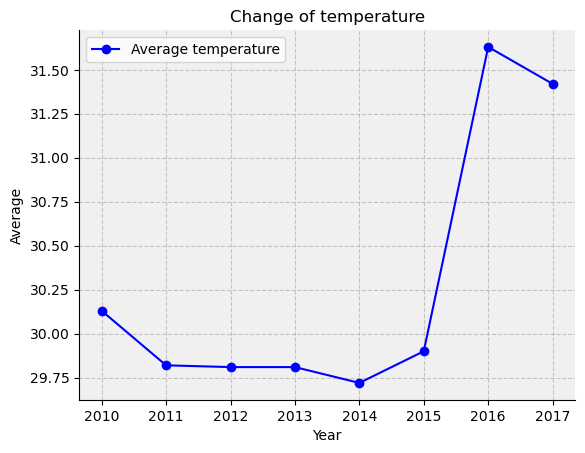

In [5]:
#plotting the data 
plt.plot(df1["Year"], df1["Average"],  marker='o', linestyle='-', color='b', label='Average temperature')

#write the label names
plt.xlabel("Year")
plt.ylabel("Average")

#name the graph
plt.title("Change of temperature")

plt.grid(True)

# Adding a legend
plt.legend()

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color for better contrast
plt.gca().set_facecolor('#f0f0f0')

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Plot
plt.show()

# Analysing the change of temperature

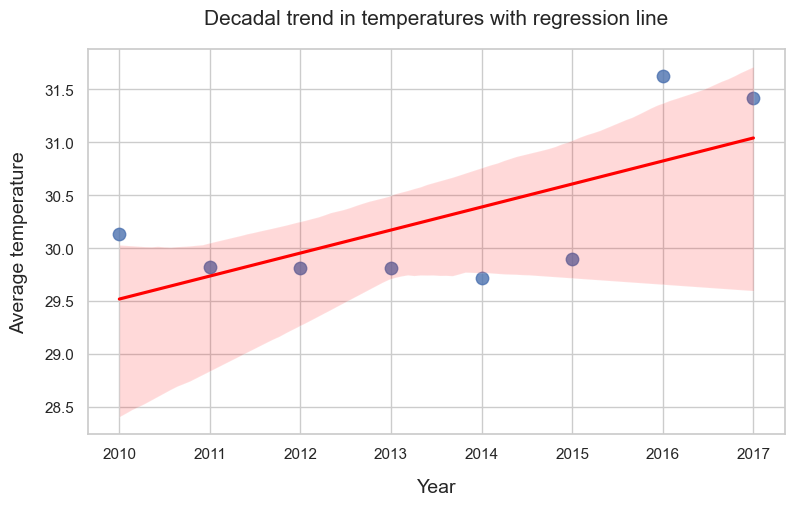

In [6]:
# Calculate the regression line using linregress from scipy
slope, intercept, r_value, p_value, std_err = linregress(df1["Year"], df1["Average"])

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with a regplot for the regression line
plt.figure(figsize=(9, 5))
sns.regplot(x=df1["Year"], y=df1["Average"], scatter_kws={"s": 80}, line_kws={"color": "red"})

# Adding labels and title with style
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Average temperature', fontsize=14, labelpad=12)
plt.title('Decadal trend in temperatures with regression line', fontsize=15, pad=18)

# Display the plot
plt.show()


# Analyse non-linear data behavior

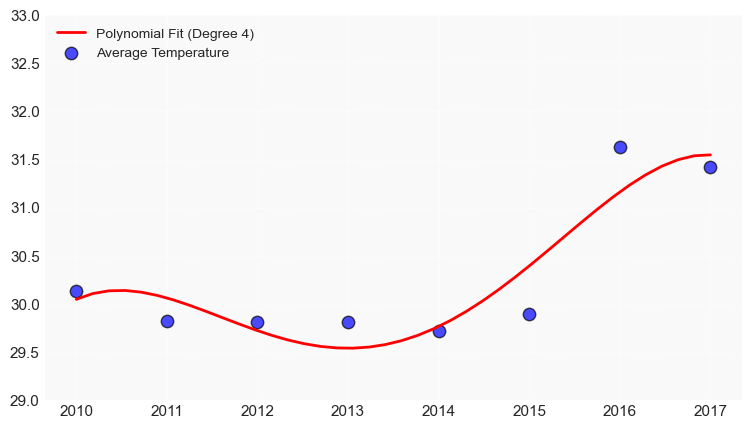

In [7]:
# Train Algorithm (Polynomial)
degree = 4
poly_fit = np.poly1d(np.polyfit(df1["Year"], df1["Average"], degree))

# Set a custom seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a smoother curve by increasing the number of points
xx = np.linspace(2010, 2017, 40)

# Use a context manager 
with plt.style.context("seaborn-darkgrid"):

    # Create a figure with a more elaborate design
    plt.figure(figsize=(9, 5))
    
    # Plot data with a smoother polynomial fit
    plt.plot(xx, poly_fit(xx), c='red', linestyle='-', linewidth=2, label=f'Polynomial Fit (Degree {degree})')

    # Scatter plot for original data with larger, transparent markers
    plt.scatter(df1["Year"], df1["Average"], label='Average Temperature', color='blue', alpha=0.7, s=80, edgecolors='black')

    # Set the y-axis limit for better visualization
    plt.ylim(29, 33)

    # Display the legend with a shadow for emphasis
    plt.legend(fontsize=10, loc='upper left', shadow=True)

    # Add grid with increased transparency and linestyle
    plt.grid(True, linestyle='--', alpha=0.5)

    # Customize the tick parameters for a cleaner appearance
    plt.tick_params(axis='both', which='both', length=0)

    # Add a background color for a more sophisticated look
    plt.gca().set_facecolor('#F9F9F9')

    # Show the plot
    plt.show()


# Correlation analysis

In [8]:
#correlation coeffienct 
correlation_coefficient = df1["Year"].corr(df1["Average"])
print(f'Correlation coefficient between {"Year"} and {"Average temperature"}: {correlation_coefficient}')

#Pearson's correlation coefficient 
corr, _ = pearsonr(df1["Year"], df1["Average"])
print('Pearsons correlation: %.3f' % corr)

#R-squared score
print('R-squared score:', r2_score(df1["Average"], poly_fit(df1["Year"])))

Correlation coefficient between Year and Average temperature: 0.6828814611969964
Pearsons correlation: 0.683
R-squared score: 0.8525143486692721


# Covariance matrix

In [9]:
# Calculate covariance matrix
covariance_matrix1 = df1[['Year', 'Average']].cov()

print("Covariance Matrix:")
print(covariance_matrix1)

Covariance Matrix:
             Year   Average
Year     6.000000  1.304286
Average  1.304286  0.608000


### Scale the data and use a heatmap for correlation

Correlation Matrix:
             Year   Average
Year     1.000000  0.682881
Average  0.682881  1.000000


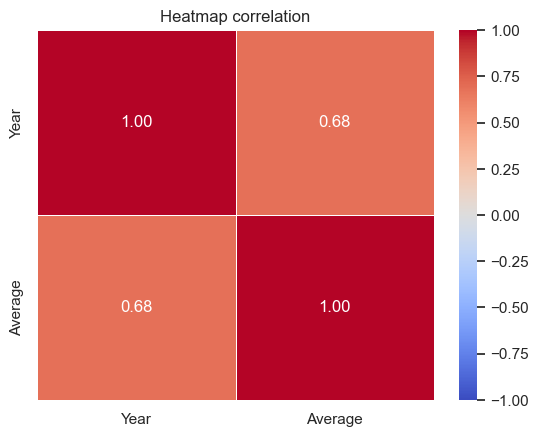

In [10]:
# Calculate correlation matrix
correlation_matrix1 = df1[['Year', 'Average']].corr()

print("Correlation Matrix:")
print(correlation_matrix1)

# Plot heatmap
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=.5)
plt.title('Heatmap correlation')
plt.show()


## Question 2. Is there any change in Co2 emissions between 2010 and 2017?

To answer this question, we use a scatter plot and observe the change in Co2 emmissions with the help of linear regression between 2010 and 2017. We take the amount of emmissions of the particular year and plot that on the y-axis and plot the corresponding year on x-axis.

### Dataset 2: Co2 emmissions

### Load the dataset 

In [11]:
#import the dataset
df2 = pd.read_csv(r"../data/co2_emission.csv")
df2.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


### Clean the data

In [12]:
#sort the data
df2 = df2.sort_values(by='Entity', ascending=True)

#only select the data for India between 2010 and 2017
df2 = df2[(df2["Entity"] == "India") & (df2["Year"] >= 2010)]
df2 = df2.drop(['Code'], axis=1)

#sort the data
df2 = df2.sort_values(by = "Year")
df2.head(20)

# Rename the 'Entity' column to 'Country'
df2.rename(columns={'Entity': 'Country'}, inplace=True)
df2.rename(columns={'Annual CO₂ emissions (tonnes )': 'Emissions'}, inplace=True)
df2.head(10)

,Country,Year,Emissions
9452,India,2010,1.700027e+09
9453,India,2011,1.817172e+09
9454,India,2012,1.983759e+09
9455,India,2013,1.997879e+09
9456,India,2014,2.207534e+09
9457,India,2015,2.276407e+09
9458,India,2016,2.377448e+09
9459,India,2017,2.466765e+09


## Optional! Convert large numbers into readable format. 
- Read methods section 4 before use!

In [10]:
# Converting large numbers into readable form

# Add it into a new column

# Only run this if you want to convert the numbers of co2 emmissions into a non-exponential number.
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

# Human_format(2.466765e+09)

df2['Emissions'] = df2['Emissions'].apply(human_format) # run only once otherwise re run every cell again!
df2.head()

,Country,Year,Emissions
9452,India,2010,1.7B
9453,India,2011,1.82B
9454,India,2012,1.98B
9455,India,2013,2B
9456,India,2014,2.21B


### Change in Co2 emmissions

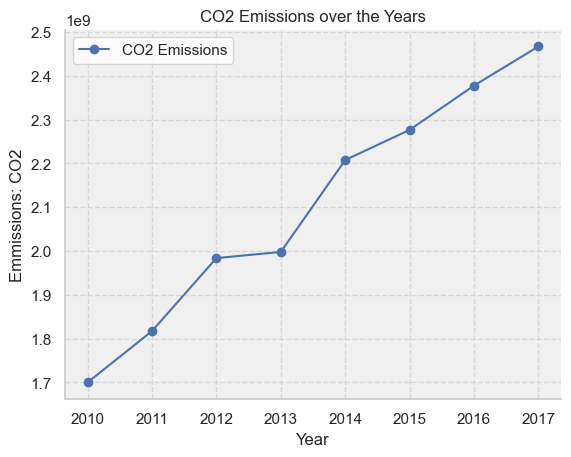

In [13]:
# Plotting the data
plt.plot(df2["Year"], df2["Emissions"], marker='o', linestyle='-', color='b', label='CO2 Emissions')

# Adding into axes
plt.xlabel("Year")
plt.ylabel("Emissions: CO2")

# Adding a grid
plt.grid(True)

# Adding a title to the plot
plt.title("CO2 Emissions over the Years")

# Adding a legend
plt.legend()

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color for better contrast
plt.gca().set_facecolor('#f0f0f0')

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Plot
plt.show()

# Analysing the change

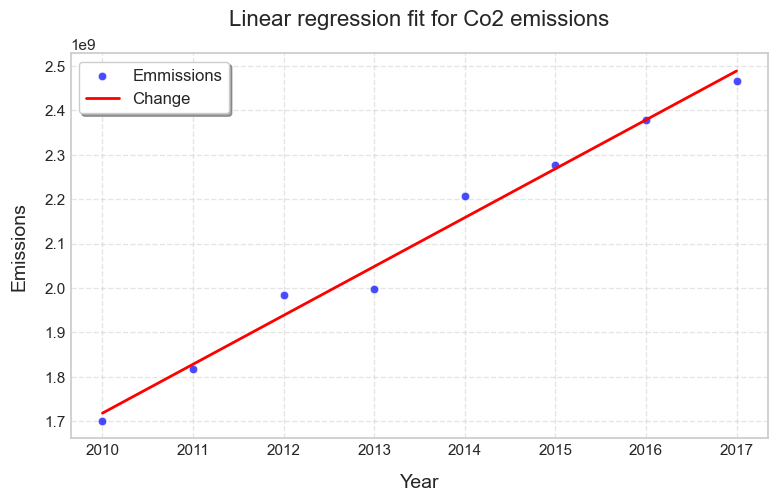

In [14]:
# Defining the columns
year = df2['Year']
emissions = df2['Emissions']

# Fit a linear regression model
model = LinearRegression()
model.fit(year.values.reshape(-1, 1), emissions)

# Predicted values
predicted_values = model.predict(year.values.reshape(-1, 1))

# Set seaborn style
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(9, 5))
sns.scatterplot(x=year, y=emissions, label='Emissions', color='blue', alpha=0.7)
plt.plot(year, predicted_values, color='red', label='Change', linewidth=2)

# Adding labels and title with style
plt.title('Linear regression fit for Co2 emissions', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Emissions', fontsize=14, labelpad=12)

# Display the legend with shadow for emphasis
plt.legend(fontsize=12, loc='upper left', shadow=True)

# Add grid with increased transparency and linestyle
plt.grid(True, linestyle='--', alpha=0.5)

# Customize the tick parameters for a cleaner appearance
plt.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()


# Correlation coefficient 

In [15]:
#correlation coeffienct 
correlation_coefficient = df2["Year"].corr(df2["Emissions"])
print(f'Correlation coefficient between {"Year"} and {"Co2 emissions"}: {correlation_coefficient}')

#Pearson's correlation coefficient 
corr, _ = pearsonr(df2["Year"], df2["Emissions"])
print('Pearsons correlation: %.3f' % corr)

# Print R-squared score
r_squared = r2_score(emissions, predicted_values)
print('R-squared score:', r_squared)

Correlation coefficient between Year and Co2 emmissions: 0.9922292926400624
Pearsons correlation: 0.992
R-squared score: 0.984518969173002


# Covariance matrix

In [16]:
# Calculate covariance matrix
covariance_matrix2 = df2[['Year', 'Emissions']].cov()

print("Covariance Matrix:")
print(covariance_matrix2)

Covariance Matrix:
                   Year    Emmissions
Year                6.0  6.611534e+08
Emmissions  661153402.0  7.399956e+16


### Scale the data and use a heatmap for correlation

Correlation Matrix:
                Year  Emmissions
Year        1.000000    0.992229
Emmissions  0.992229    1.000000


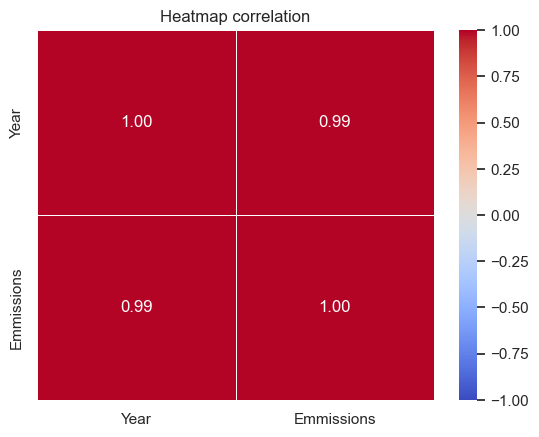

In [17]:
# Calculate correlation matrix
correlation_matrix2 = df2[['Year', 'Emissions']].corr()

print("Correlation Matrix:")
print(correlation_matrix2)

# Plot heatmap
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=.5)
plt.title('Heatmap correlation')
plt.show()

# Results

- Using the information gathered from visual graphs and statistical metrics, we answer the important questions to prove or disprove correlation

# Question 1 
- Is there any change in temperature between 2010 and 2017?

# Inference 1
- In the initial time period between 2010 and 2014: we can see a directional relation as it was increasing and decreasing simultaneously. 
- After the year 2014, we can see an upward trend of temperature. 
- Statistical metrics like correlation coefficient and scatter plots imply a positive correlation mathematically.

# Question 2 
- Is there any change in Co2 emissions between 2010 and 2017?

# Inference 2
- With respect to time, we can see a constant upward increase of Co2 emissions. 
- With the help of visualisation graphs: we can report a positive correlation of Co2 emissions with respect to time.
- Statistical metrics like correlation coefficient support the positive correlation mathematically.

# Summary
- We attemt to draw a conclusion with the following question:

# Question 3
- Is there any correlation between Co2 emmissions and temperatures during a certain time period?

# Inference 3 
- Considering the common base of time - Year. We can conclude that both Co2 emissions and temperature are correlated to each other.

- Using the scatter plots (and heatmaps) of both temperature and Co2 emissions: we can see an increase in both the factors.

- The statistical metrics such as Pearsons' coefficient, R-squared score and covariance matrices provide enough evidence and support that both the factors are increasing during the time period of 2010 - 2017. Conclusively, they are correlated to each other.

- After considering the visual graphical plots: scatter plot and heatmaps on a common base of time - Year, relations have been described by covariance matrices, correlation matrics and results derived from Pearson correlation coefficient, R-square score, we can arrive at the conclusion that both temperature and Co2 emissions are related to each other.

# Furthur research
- Although we could draw a conclusion from the gathered information and insights, certain questions are still prevailing:

    1. If temperature and Co2 emissions are correlated to each other, how come there is a constant rise in Co2 emissions between 2010 and 2014 despite a stagnant directional behaviour of temperature in the same phase of time ?
    
    2. Are either of the factors causing a change in the other factor ?